### Candidate: Melwin James Poovakottu

Context

Company XYZ has a list of sales leads that potentially could develop into a business opportunity. To maximize the quality of these leads, XYZ is developing a lead management process, involving system and machine learning algorithms, eventually distributing leads to the sales team for closing. The initial contact lead information (including First Name, Last Name, Mailing Street, Mailing State, Mailing Zip, and Phone) have already been provided. Additional attributes such as “Phone to Name Match" and "Address to Name Match" are generated from matching contacts against XYZ’s customer management system database. The Lead_Verifiy_Response file includes a sample of contacts along with each contact’s corresponding attributes(features) and call outcome. Each record/row includes the contact’s name, address, phone number, and the contact’s 10 features along with outcome.

Input Data
1.	First Name: a contact’s first name
2.	Last Name: a contact’s last name
3.	Mailing Street: mailing street
4.	Mailing State: state
5.	Mailing Zip: postal code
6.	Phone: a contact’s phone number

Features
1.	Phone to Name Match: a contact’s name and phone match against CMS database. There are four categories of matching result: 
a.	Phone to name Match
b.	No name found for phone number
c.	Phone to name No Match
d.	Invalid phone number
2.	Phone Is Valid: phone number is valid, True or False
3.	Phone Line Type: Landline, Fixed VOIP, Non-fixed VOIP, ...
4.	Phone Prepaid: True or False
5.	Phone Is Commercial: True or False
6.	Address to Name Match: a contact’s name and address matching against CMS database. There are four categories of matching result: 
a.	Address to name match
b.	No name found for address
c.	Either address to name no match
d.	Invalid address
7.	Address Is Valid: address is valid, True or False
8.	Address Type: e.g. Single unit, Multi unit, ...
9.	Address Is Active: True or False
10.	Address Is Commercial: True or False

Outcome(Label)
1.	Call Disposition: ranges from 1 to 6


Challenge

Call disposition score of 1 is the primary goal. Score of 2 is the secondarily desired, and 6 is the least desirable. XYZ is trying to predict what feature/attribute or combinations will lead to the highest percentage of score 1? How would you go about solving this problem? What algorithms and methods would you use? What steps would you take? What feature or features produce the best result? Please provide the code associated with this project. The programming language to be used is python. 



In [1]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# General libraries.
import re
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as pyplot
import  numpy as np 
import pandas as pd
import seaborn as sns

# SK-learn libraries for learning.
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.grid_search import GridSearchCV
from sklearn import linear_model as lm 
from sklearn import preprocessing as pp

# SK-learn libraries for evaluation.
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report

C:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Anaconda\envs\tensorflow\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


### Loading the data and printing few roles

In [2]:
data = pd.read_csv("./Lead_Verify_Response.csv")


print("Table 1")
data.head()

Table 1


,ORDER,First Name,Last Name,Mailing Street,Mailing City,Mailing State,Mailing Zip,Phone,Phone to Name,Phone Is Valid,Phone Line Type,Phone Is Prepaid,Phone Is Commercial,Address to Name,Address Is Valid,Address Type,Address Is Active,Address Is Commercial,Call Disposition
0,1,Donald,Mathews,789 Cambridge Place,Hanover,MD,21076,860-452-9151,No match,True,Landline,False,True,No match,True,Multi unit,True,True,5
1,2,Sharon,Ogden,3929 Timber Ridge Road,Sacramento,CA,95814,213-624-4444,No match,True,Landline,False,False,No match,True,Multi unit,True,True,5
2,3,Timothy,Villa,4493 Freedom Lane,Stockton,CA,95204,309-578-4670,Match,True,Fixed VOIP,False,True,No match,True,Unknown address type,NaN,True,1
3,4,Stephen,Jackson,1739 Five Points,Salisbury,MD,21875,563-574-3653,No match,True,Fixed VOIP,False,True,No match,True,Single unit,True,False,6
4,5,Emilie,Sierra,2969 Bell Street,New York,NY,10022,408-236-9031,No match,True,Fixed VOIP,False,True,No match,True,Multi unit,True,True,6


Here we can see there are few rows which are empty. We shall be handling them later.

### Data Prep

Lets look at the outcome variable a bit closely using a histogram and unique value counts

2    2841
6    2835
1    2307
5    1080
3     832
4     105
Name: Call Disposition, dtype: int64

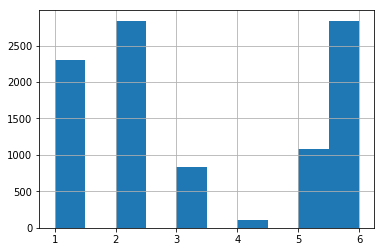

In [3]:
call_dis = data.iloc[:,-1]

## Lets see the count of all the call disposition 
call_dis.hist()
call_dis.value_counts()

We can see that there are only 2307 calls with score 1 whereas there are 7693 records with score not equal to 1. Also if you look at table above carefully we can see there are some NaN values. Lets reassess the data without the NaN values

No of records with data : 7755


2    2320
6    2204
1    1719
5     793
3     624
4      95
Name: Call Disposition, dtype: int64

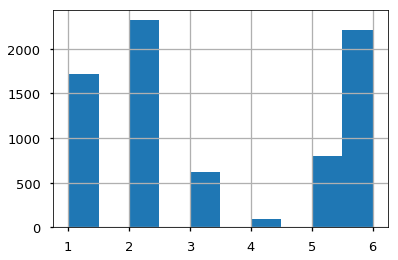

In [29]:
data_no_na = data.dropna()
call_dis = data_no_na.iloc[:,-1]
print("No of records with data :",data_no_na.shape[0])

## Lets see the count of all the call disposition 
call_dis.hist()
call_dis.value_counts()

Now after removing the NaN values we can see that there are only 1719 records with score 1 whereas there are 6036 records with score not equal to 1. This suggestes that there are imbalances classes in the data.

We see that almost 25% of the data had NaN values. A huge part of Data Science is to handle data which contains NaN values. It includes thorough investigation of the data and the reason why there are NaN values in the data. Is there any correlation between the NaN values and the outcome variable or is it totally random? What is the best replacement for NaN etc.
 
Comparing Histogram 1 and Histogram 2 we can see that there is not much difference in distribution of data with NaN and without NaN values. Hence in the interest of time we asume the NaN and the outcome variable is not co-related and shall proceed with only the records which contain data in all the columns

#### Creating a Label for outcome variable

We shall create a new dataframe with the new labels for the outcome variable i.e. Score = 1. When the score is 1 then the label shall also be 1; but if the score is any other call disposition score than 1; then the label shall be 0. Looking at the histogram and value counts for the label we can see that there are imbalanced classes. There are 1719 records with score 1 whereas 6036 with score which is not 1(i.e. label = 0). Due to the imbalanced classes we cannot use Accuracy in our mertic of model evaluation. We should be using F1-score. More on that later.

0    6036
1    1719
Name: Call Disposition, dtype: int64


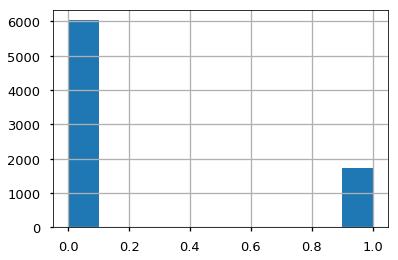

In [30]:
labels = data_no_na.iloc[:,-1].apply( lambda x: 1 if x==1 else 0)
labels.hist()
print(labels.value_counts())

## Some Feature Engineering

#### Lets Analyse the column/feature Mailing State

Lets plot the count of records from each state and color it by the score see if there any patterns

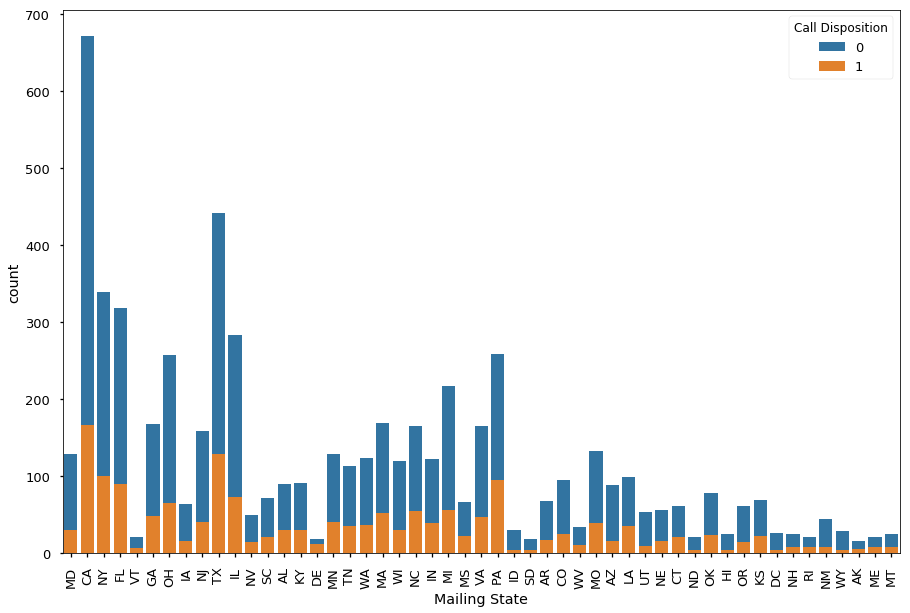

In [6]:
data_no_na['Mailing State']
sns.set_context("talk")
f, ax = pyplot.subplots(figsize=(15, 10))
g = sns.countplot(data_no_na['Mailing State'], hue  =  labels, dodge = False, ax= ax)
d = g.set_xticklabels(g.get_xticklabels(), rotation=90)

We can clearly see that there is good amount of varitation in the data.

 #### Mailing City

Now lets look at the Mailing City variable. Below we have calculated the percent of records for each city in the data. We see that there are 2387 cities and highest calls are to New York or Los Angeles that which accounts for only 1.7% of the data. Everything else is below 1.2% with majority cities below 0.05%/
Since Mailing City is a categorical variable adding city as a feature we would require to one hot encode all of the 2387 cities. This shall increase the number of columns in the model without increasing any useful information precent in the data. This will make the models easyily over fit(I already tired it). Also the most of variation in the data has already been capurted in Mailing State variable. The same issue shall be faced by other columns in the data such as First Name, Last Name, Mailing Street, Mailing Zip and Phone. Hence we shall not be including these columns in our analysis

In [7]:
data_no_na['Mailing City'].value_counts()/data_no_na.shape[0]

New York         0.017408
Los Angeles      0.016377
Chicago          0.011348
Houston          0.011348
Philadelphia     0.010316
Seattle          0.007866
Atlanta          0.007866
San Francisco    0.007350
Dallas           0.007092
Washington       0.006705
Portland         0.006705
Phoenix          0.006319
Indianapolis     0.005932
Minneapolis      0.005803
Jackson          0.005674
San Diego        0.005416
Nashville        0.005287
Newark           0.005158
Charlotte        0.004900
Jacksonville     0.004771
Miami            0.004771
Oakland          0.004642
Denver           0.004513
Tampa            0.004513
Louisville       0.004384
Springfield      0.004384
Pittsburgh       0.004384
Grand Rapids     0.004255
Baltimore        0.004126
San Antonio      0.004126
                   ...   
Beaver Dam       0.000129
Alamito          0.000129
Walcott          0.000129
Boligee          0.000129
Brownsville      0.000129
Holley           0.000129
Clover           0.000129
Taunton     

### Gender Variable

Lets look at the gender of the Leads. Since we do not have have a explict gender variable in the data we have to derive it from the First name of the Lead. We shall be using a python library called gender_guesser for the same. Once we guess the gender of the lead, we shall add it as a feature in the dataset(next code block)

C:\Anaconda\envs\tensorflow\lib\site-packages\ipykernel\__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


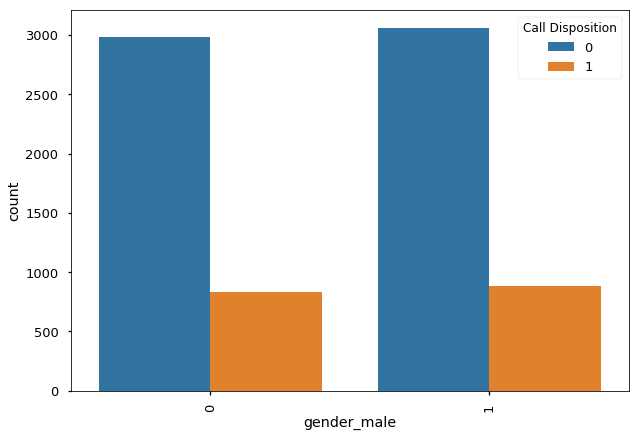

In [8]:
import gender_guesser.detector as gender
d = gender.Detector()
male = data_no_na['First Name'].map(d.get_gender)
data_no_na['gender_male'] = male.map(lambda x: 1 if x in ['male','mostly_male','unknown'] else 0 )
f,ax = pyplot.subplots(figsize=(10,7))
g = sns.countplot(data_no_na['gender_male'] , hue  =  labels , dodge = True, ax= ax)
d = g.set_xticklabels(g.get_xticklabels(), rotation=90)

# tRAIL 

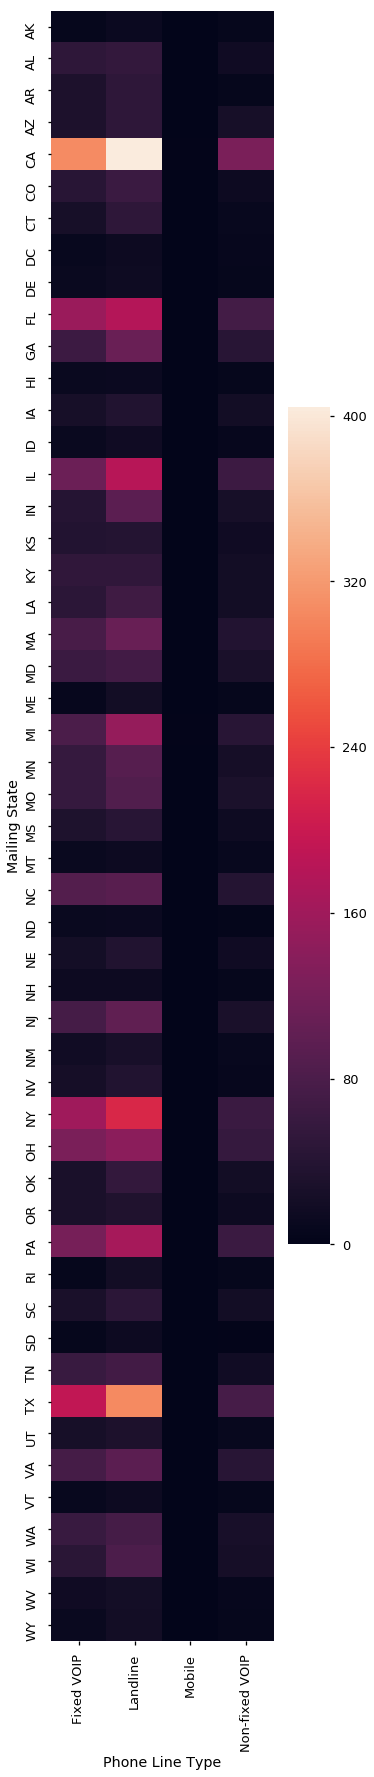

In [57]:
#new_data  = pd.concat([data_no_na,labels], axis=1)
f,ax = pyplot.subplots(figsize=(5,30))
piv = data_no_na.pivot_table(columns='Phone Line Type',index='Mailing State',aggfunc='count',fill_value=0 )
sns.heatmap(piv['Address Is Active'],ax=ax)

### Converting the categorical variables to dummy variables or flag variables

Now lets start converting the columns with String columns into boolean or hot encoded columns. We shall convert all the boolean variables to column features with 0 or 1. 1 being True and 0 being false. We shall one hot encode all the useful categorical variables using the get_dummy function in Pandas

In [9]:
## All the columns which are either positive or negatice values 
flagged_var = ["Phone Is Valid","Phone Is Prepaid","Phone Is Commercial","Address Is Valid","Address Is Active","Address Is Commercial"]

#We shall assign them 1 if True else zero
df_flags = data_no_na[flagged_var].applymap(lambda x: 1.0 if x else 0.0)

#There are few categorical factors well. We shall be ingoring First Name, Last Name, Mailing Street, Mailing Zone and phone number
## because they do not directly effect the call dispotion

## Categorical columns that we shall be one hot encoding
encoded_var = ['Mailing State','Phone to Name', 'Phone Line Type', 'Address to Name', 'Address Type']

df_dummy = pd.get_dummies(data_no_na[encoded_var])
data_f = pd.concat([df_flags,df_dummy,data_no_na['gender_male']],axis = 1)



Since all of our variables are categorical variables or boolean variables we can consider the mean of the column as their probability of being true.
In the below table I caculated the proability for each column to be either one or zero. We see that there are few columns which have the mean of 1 (Phone Is Valid and Address Is Valid). These means they have only ones in the data. Also on closer look we can see some columns which have no or very less data(mean = ~0)

In [10]:
diff = pd.concat([data_f[labels==0].mean(axis=0),data_f[labels==1].mean(axis=0), data_f[labels==0].mean(axis=0)-data_f[labels==1].mean(axis=0)],axis=1)
diff.columns=["Means_0","Means_1","Differences"]

print(diff)

                                    Means_0   Means_1  Differences
Phone Is Valid                     1.000000  1.000000     0.000000
Phone Is Prepaid                   0.001325  0.000582     0.000744
Phone Is Commercial                0.859013  0.874927    -0.015915
Address Is Valid                   1.000000  1.000000     0.000000
Address Is Active                  0.985918  0.984293     0.001625
Address Is Commercial              0.842114  0.840605     0.001509
Mailing State_AK                   0.002651  0.003490    -0.000840
Mailing State_AL                   0.014911  0.017452    -0.002541
Mailing State_AR                   0.011266  0.009889     0.001376
Mailing State_AZ                   0.014745  0.009308     0.005437
Mailing State_CA                   0.111332  0.097150     0.014183
Mailing State_CO                   0.015739  0.014543     0.001196
Mailing State_CT                   0.010272  0.012798    -0.002526
Mailing State_DC                   0.004307  0.002327     0.00

There are some columns(some dummy columns for various states) have very little or no variation across call disposition values. Hence we shall be ingnoring such columns. 

In [11]:
diff_new = diff[abs(diff.Differences)>0.0001]

We shall be considering only the following columns(i.e. columns which have some varitation in the data). By doing this we reduce the number of columns; thus reducing few of unneccesary columns.

In [12]:
pd.DataFrame(diff_new.index)

,0
0,Phone Is Prepaid
1,Phone Is Commercial
2,Address Is Active
3,Address Is Commercial
4,Mailing State_AK
5,Mailing State_AL
6,Mailing State_AR
7,Mailing State_AZ
8,Mailing State_CA
9,Mailing State_CO


### Modelling 

Lets first start with spliting the data into Train and test sets.[ Please note that all the hyperparameters are already tuned using dev set. I removed all the hyperparameter tuning parts of the code from this notebook just to keep the notebook clean and organised]

Here X_train and y_train contains the training dataset and its coresponding labels respectively. Similarly X_test and y_test are the testing dataset and labels. Here we are taking a representative sample. In other words we are randomly sampling the data for all the classes. Since the classes are imbalanced in the data the sample taken shall also have imbalanced classes

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data_f[diff_new.index],labels, test_size=0.2, stratify=labels, random_state=123526)


### Random Forest Model

Lets first start with the Random Forest Classifier (already tuned for highest avg F1 score with high F1 score for class label 1 )

In [14]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=500, oob_score=True, random_state=0,class_weight="balanced")
rf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score
pred_rf = rf.predict(X_test)


print("Training Score:",rf.score(X_train, y_train))
print("Testing Score:", rf.score(X_test, y_test))
print()
print("Confusion Matrix")
print(pd.DataFrame(confusion_matrix(pred_rf,y_test)))
print()
print("Classification  Report")
print(classification_report(y_test, pred_rf))


Training Score: 0.8043197936814958
Testing Score: 0.6524822695035462

Confusion Matrix
     0    1
0  891  223
1  316  121

Classification  Report
             precision    recall  f1-score   support

          0       0.80      0.74      0.77      1207
          1       0.28      0.35      0.31       344

avg / total       0.68      0.65      0.67      1551



Since there are imbalanced classes we have to focus on F1-scores. We see that  F1-score for testing is 0.67  with training accuracy is 80% and testing accuracy for 66%.We can also see the confustion matrix and see that there are quite a few records are being miss labeled. Even though there is some evidence of overfitting we shall keep the model as is since it have good F1 score. We can handle the over fitting later.

Below we can see the importance of each column in numeric order. Higher the better

In [15]:
pd.DataFrame([diff_new.index,rf.feature_importances_]).T

,0,1
0,Phone Is Prepaid,0.000293697
1,Phone Is Commercial,0.0401796
2,Address Is Active,0.0115043
3,Address Is Commercial,0.0465213
4,Mailing State_AK,0.00264522
5,Mailing State_AL,0.0113142
6,Mailing State_AR,0.0095294
7,Mailing State_AZ,0.00951111
8,Mailing State_CA,0.0253327
9,Mailing State_CO,0.0107674


### Logistic Regression Model (With optimized ROC curve)

We create a logistic regression model with fine tuned hyperparameters. We also vary the threshold level to vary the ROC curve(commented code). With the fine tuned parameters we have the best score of 0.7 F1 Score

In [16]:
def set_threshold(pred,threshold):
    return pd.DataFrame(pred).iloc[:,1].apply(lambda x: 1 if x>threshold else 0)

import sklearn.linear_model as lm
lgr= lm.LogisticRegression(C=0.000006,max_iter=1000,penalty='l2',class_weight='balanced' )
lgr.fit(X_train,y_train)
from sklearn.metrics import accuracy_score
#for i in np.arange(0.48,0.505,0.0001):
#   print(i)
#    pred_lgr=[]
#    pred_lgr = set_threshold(lgr.predict_proba(X_test),i)
#   print(classification_report(y_test, pred_lgr))

pred_lgr = set_threshold(lgr.predict_proba(X_test),0.5005)
print("Training Score:",lgr.score(X_train,y_train))
print("Testing Score:",lgr.score(X_test,y_test))
print()
print("Confusion Matrix")
print(pd.DataFrame(confusion_matrix(pred_lgr,y_test)))
print()
print("Classification  Report")
print(classification_report(y_test, pred_lgr))

Training Score: 0.6178272082527402
Testing Score: 0.6099290780141844

Confusion Matrix
     0    1
0  974  236
1  233  108

Classification  Report
             precision    recall  f1-score   support

          0       0.80      0.81      0.81      1207
          1       0.32      0.31      0.32       344

avg / total       0.70      0.70      0.70      1551



We see 3% improvement in this model compared to the Random forest model. But if you look at the Confusion matrix you will see that this model is assigning more records to 0 labels 

### Linear SVM model

We create one more model which uses a SVM model with Logisitic regression kernel but L1 penality

In [17]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
lsvc = LinearSVC(C=0.003,penalty="l1", dual=False,class_weight='balanced').fit(X_train, y_train)
pred_lsvc = lsvc.predict(X_test)
print( "Training Score:",lsvc.score(X_train,y_train))
print( "Testing Score:",accuracy_score(y_test,pred_lsvc))
print()
print("Confusion Matrix")
print(pd.DataFrame(confusion_matrix(pred_lsvc,y_test)))
print()
print("Classification  Report")
print(classification_report(y_test, pred_lsvc))

Training Score: 0.6176660219213411
Testing Score: 0.6131528046421664

Confusion Matrix
     0    1
0  754  147
1  453  197

Classification  Report
             precision    recall  f1-score   support

          0       0.84      0.62      0.72      1207
          1       0.30      0.57      0.40       344

avg / total       0.72      0.61      0.64      1551



### Model Ensemble (Model voting)

Now that we have three different models we can take a vote from all three models to see if the record should be labels 1 or 0. We use a list (Prediction) to store the voting results and then print the accuracy, confusion matrix and the classification report. This approach can be thought of another ensemble method but here we use various models (instead of trees) to remove the bais and variance from models create the most generalized model even though the accuracy/F1 score is not the highest.

In [18]:
prediction = []
for i,y_hat in enumerate(y_test):
    if (pred_rf[i]+pred_lgr[i]+pred_lsvc[i])>1:
        prediction.append(1)
    else:
        prediction.append(0)

print( "Testing Score:",accuracy_score(y_test,prediction))
print()
print(pd.DataFrame(confusion_matrix(y_test,prediction)))
print()
print("Classification  Report")
print(classification_report(y_test, prediction))
    

Testing Score: 0.6718246292714378

     0    1
0  900  307
1  202  142

Classification  Report
             precision    recall  f1-score   support

          0       0.82      0.75      0.78      1207
          1       0.32      0.41      0.36       344

avg / total       0.71      0.67      0.69      1551



### Create balanced classes by oversampling minority class and under sampling majority class

Here we shall create balanced samples for each of the classes by oversampling minority class and under sampling majority class

In [19]:
data_fe = pd.concat([data_f[labels == 1].sample(3000, replace = True),data_f[labels == 0].sample(3000)],axis=0)
data_fe
labels = labels[data_fe.index]

Lets create the Test and Train split

In [20]:
from sklearn.model_selection import train_test_split
X_train2, X_test2, y_train2, y_test2 = train_test_split(data_fe[diff_new.index],labels, test_size=0.2, stratify=labels, random_state=123526)


#### Gradient Boosting Classifier

Lets create a Gradient boosted ensemble classifier using the balanced dataset

In [21]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(loss= 'exponential',n_estimators=800,max_depth=15,subsample= 0.8)
gb.fit(X_train2,y_train2)

pred_gb2 = gb.predict(X_test2)
pred_gb = gb.predict(X_test)
print(" Confusion matrix for the current sample")
print(pd.DataFrame(confusion_matrix(pred_gb2,y_test2)))
print()
print(" Confusion matrix for the pervious representative sample")
print(pd.DataFrame(confusion_matrix(pred_gb,y_test)))
print()
print(" Classification report for the current sample")
print(classification_report(y_test2, pred_gb2))
print()
print(" Classification report for the pervious representative sample")
print(classification_report(y_test, pred_gb))

 Confusion matrix for the current sample
     0    1
0  378  166
1  222  434

 Confusion matrix for the pervious representative sample
     0    1
0  816   87
1  391  257

 Classification report for the current sample
             precision    recall  f1-score   support

          0       0.69      0.63      0.66       600
          1       0.66      0.72      0.69       600

avg / total       0.68      0.68      0.68      1200


 Classification report for the pervious representative sample
             precision    recall  f1-score   support

          0       0.90      0.68      0.77      1207
          1       0.40      0.75      0.52       344

avg / total       0.79      0.69      0.72      1551



Here we can see gradient boosting algorithm performing really well with Higest F1-score of o.72 for the representative sample.It also performed well in both in the balance sample test data as well as the representative sample test data

### K nearest neighbour model

Lets also check the k nearest nieghbor model with the latest sample

In [22]:
from sklearn.neighbors import KNeighborsClassifier
mb = KNeighborsClassifier(n_neighbors=10, weights='distance', algorithm='brute',p=1)
mb.fit(X_train2,y_train2)
pred_mb2 = mb.predict(X_test2)
pred_mb = mb.predict(X_test)
print(" Confusion matrix for the current sample")
print(pd.DataFrame(confusion_matrix(pred_mb2,y_test2)))
print()
print(" Confusion matrix for the pervious representative sample")
print(pd.DataFrame(confusion_matrix(pred_mb,y_test)))
print()
print(" Classification report for the current sample")
print(classification_report(y_test2, pred_mb2))
print()
print(" Classification report for the pervious representative sample")
print(classification_report(y_test, pred_mb))

 Confusion matrix for the current sample
     0    1
0  381  190
1  219  410

 Confusion matrix for the pervious representative sample
     0    1
0  846  105
1  361  239

 Classification report for the current sample
             precision    recall  f1-score   support

          0       0.67      0.64      0.65       600
          1       0.65      0.68      0.67       600

avg / total       0.66      0.66      0.66      1200


 Classification report for the pervious representative sample
             precision    recall  f1-score   support

          0       0.89      0.70      0.78      1207
          1       0.40      0.69      0.51       344

avg / total       0.78      0.70      0.72      1551



K Nearest Neighbor does suprisingly well on this task, especially with the minority class F1 score for the representative sample. It is amazing to see such a simple model could outperform some of the more complex models

###  Model ensemble (Model voting) again

Lets take a vote again considering the latest two models are well

In [37]:
prediction = []
for i,y_hat in enumerate(y_test):
    if (pred_rf[i]+pred_lgr[i]+pred_lsvc[i]+pred_gb[i]+pred_mb[i])>2:
        prediction.append(1)
    else:
        prediction.append(0)

print( "Testing Score:",accuracy_score(y_test,prediction))
print()
print(pd.DataFrame(confusion_matrix(y_test,prediction)))
print()
print("Classification  Report")
print(classification_report(y_test, prediction))

Testing Score: 0.7105093488072212

     0    1
0  910  297
1  152  192

Classification  Report
             precision    recall  f1-score   support

          0       0.86      0.75      0.80      1207
          1       0.39      0.56      0.46       344

avg / total       0.75      0.71      0.73      1551



Here we see the voting mechanism doing much better than our first voting mechanism

## We can see that we have accuracy of 75% and an F1 score of 0.74

### Appendix(Not part of the report)

In [24]:
#model = SelectFromModel(lsvc, prefit=True)
#X_new = model.transform(X_train2)
#pd.DataFrame(X_new)
#lsvc = LinearSVC(C=.05, penalty="l1", dual=False).fit(X_new, y_train)
#gb3 = GradientBoostingClassifier(loss= 'exponential',learning_rate=0.2, n_estimators=2000,max_depth=3, verbose = 1)
#gb3.fit(X_new,y_train2)
#pred_gb3 = gb3.predict(model.transform(X_test2))

#print(gb3.score(X_new,y_train2))
#print( accuracy_score(y_test2,pred_gb3))
#print(pd.DataFrame(confusion_matrix(pred_gb3,y_test2)))
#print(classification_report(y_test2, pred_gb3))


In [25]:
#sdasd

#model = SelectFromModel(lsvc, prefit=True)
#X_new = model.transform(X_train)
#pd.DataFrame(X_new)
#lsvc = LinearSVC(C=.05, penalty="l1", dual=False).fit(X_new, y_train)
#gb = GradientBoostingClassifier(loss= 'deviance',learning_rate=0.2, n_estimators=2000,max_depth=3, verbose = 1)
#gb.fit(X_new,y_train)
#pred_gb = gb.predict(model.transform(X_test))

#print(gb.score(X_new,y_train))
#print( accuracy_score(y_test,pred_gb))
#print(pd.DataFrame(confusion_matrix(pred_gb,y_test)))
#print(classification_report(y_test, pred_gb))

In [26]:
#from sklearn.ensemble import GradientBoostingClassifier 

#gb = GradientBoostingClassifier(loss= 'deviance',n_estimators=500,max_depth=5, verbose = 1)
#gb.fit(X_train,y_train)
#pred_mbl = gb.predict(X_test)
#print(gb.score(X_train,y_train))
#print( accuracy_score(y_test,pred_mbl))
#print(pd.DataFrame(confusion_matrix(pred_mbl,y_test)))
#print(classification_report(y_test, pred_mbl))

In [27]:
#g = sns.FacetGrid(data_no_na, col="Address Type", hue='Call Disposition')
#g = (g.map(plt.hist, "Call Disposition"))

In [28]:
#sns.factorplot(data_no_na.iloc[:,8:], hue="Call Disposition")